## Load data

In [1]:
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
datapath = '/media/sf_VBox_Shared/timeseries/UCR_WaveGesture/'
#datapath = '/media/sf_VBox_Shared/timeseries/PAMAP2_Dataset/slidingwindow500last/'

In [4]:
X_train = np.load(datapath+'X_train.npy')
y_train_binary = np.load(datapath+'y_train_binary.npy')
X_val = np.load(datapath+'X_val.npy')
y_val_binary = np.load(datapath+'y_val_binary.npy')
X_test = np.load(datapath+'X_test.npy')
y_test_binary = np.load(datapath+'y_test_binary.npy')

print(X_train.shape)

(627, 315, 3)


In [5]:
num_classes = y_train_binary.shape[1]
print(num_classes)

8


## Generate models

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam

Using Theano backend.


In [7]:
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))

from mcfly import modelgen, find_architecture

In [8]:
models = modelgen.generate_models(X_train.shape, num_classes, number_of_models = 5, model_type = None)

In [9]:
for model, params, model_types in models:
    print(params)
    model.summary()

{'filters': array([30, 29, 39, 57, 78, 40, 92]), 'learning_rate': 0.0003480864332800926, 'lstm_dims': array([80, 26, 71])}
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
reshape_1 (Reshape)                (None, 1, 315, 3)   0           reshape_input_1[0][0]            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)    (None, 30, 315, 3)  120         reshape_1[0][0]                  
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 30, 315, 3)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 29, 315, 3)  2639        ac

## Compare models

In [10]:
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models)

Train on 100 samples, validate on 269 samples
Epoch 1/5
100/100 [==============================] - 9s - loss: 6.6435 - acc: 0.1400 - val_loss: 2.0779 - val_acc: 0.1338
Epoch 2/5
100/100 [==============================] - 9s - loss: 6.5155 - acc: 0.1600 - val_loss: 2.0836 - val_acc: 0.1338
Epoch 3/5
100/100 [==============================] - 10s - loss: 6.3866 - acc: 0.1800 - val_loss: 2.0825 - val_acc: 0.1413
Epoch 4/5
100/100 [==============================] - 11s - loss: 6.2892 - acc: 0.1500 - val_loss: 2.0784 - val_acc: 0.1152
Epoch 5/5
100/100 [==============================] - 10s - loss: 6.1640 - acc: 0.1500 - val_loss: 2.0786 - val_acc: 0.1152
Train on 100 samples, validate on 269 samples
Epoch 1/5
100/100 [==============================] - 3s - loss: 2.0789 - acc: 0.1600 - val_loss: 2.0777 - val_acc: 0.1152
Epoch 2/5
100/100 [==============================] - 3s - loss: 2.0716 - acc: 0.1600 - val_loss: 2.0762 - val_acc: 0.1152
Epoch 3/5
100/100 [==============================] 

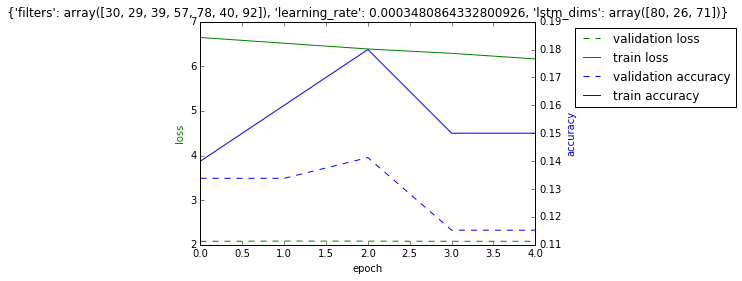

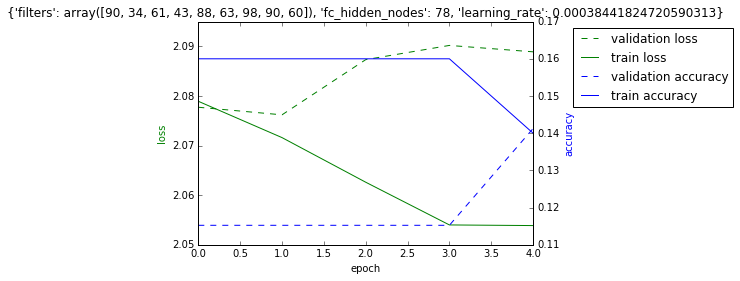

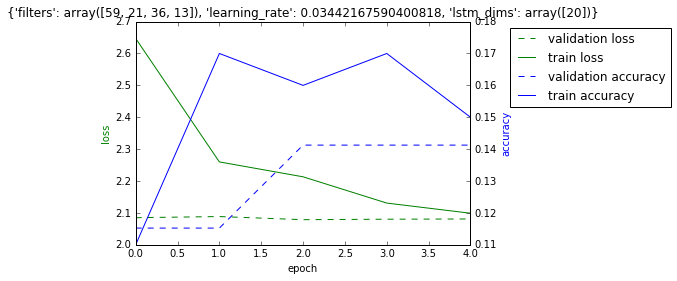

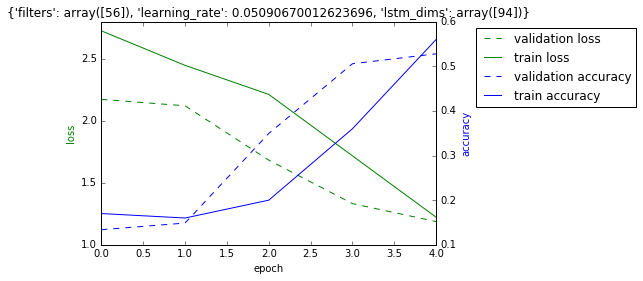

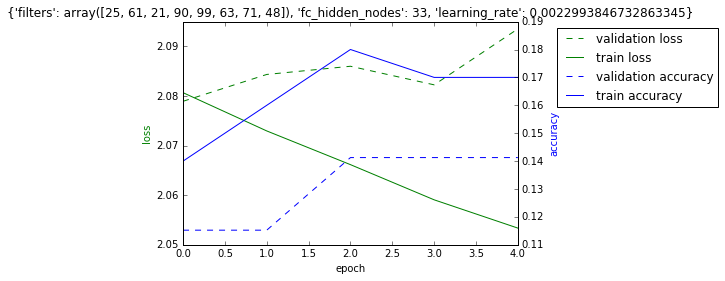

In [11]:
for i in range(len(models)):
    name = str(models[i][1])
    find_architecture.plotTrainingProcess(histories[i], name)

In [12]:
import pandas as pd

results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

,model,train_acc,train_loss,val_acc,val_loss
0,"{'filters': array([30, 29, 39, 57, 78, 40, 92]...",0.15,6.164004,0.115242,2.078635
1,"{'filters': array([90, 34, 61, 43, 88, 63, 98,...",0.14,2.053877,0.141264,2.088906
2,"{'filters': array([59, 21, 36, 13]), 'learning...",0.15,2.099002,0.141264,2.080995
3,"{'filters': array([56]), 'learning_rate': 0.05...",0.56,1.222196,0.527881,1.187310
4,"{'filters': array([25, 61, 21, 90, 99, 63, 71,...",0.17,2.053367,0.141264,2.093527


## Or do it in one command

Train on 100 samples, validate on 269 samples
Epoch 1/5
100/100 [==============================] - 9s - loss: 2.8414 - acc: 0.1300 - val_loss: 2.0881 - val_acc: 0.1338
Epoch 2/5
100/100 [==============================] - 9s - loss: 2.8096 - acc: 0.1700 - val_loss: 2.0874 - val_acc: 0.1338
Epoch 3/5
100/100 [==============================] - 9s - loss: 2.7756 - acc: 0.1800 - val_loss: 2.0805 - val_acc: 0.1338
Epoch 4/5
100/100 [==============================] - 9s - loss: 2.7590 - acc: 0.1600 - val_loss: 2.0707 - val_acc: 0.1338
Epoch 5/5
100/100 [==============================] - 9s - loss: 2.6923 - acc: 0.1900 - val_loss: 2.0618 - val_acc: 0.1487
Train on 100 samples, validate on 269 samples
Epoch 1/5
100/100 [==============================] - 1s - loss: 10.7316 - acc: 0.2000 - val_loss: 13.7214 - val_acc: 0.1487
Epoch 2/5
100/100 [==============================] - 1s - loss: 14.1839 - acc: 0.1200 - val_loss: 13.7214 - val_acc: 0.1487
Epoch 3/5
100/100 [==============================]

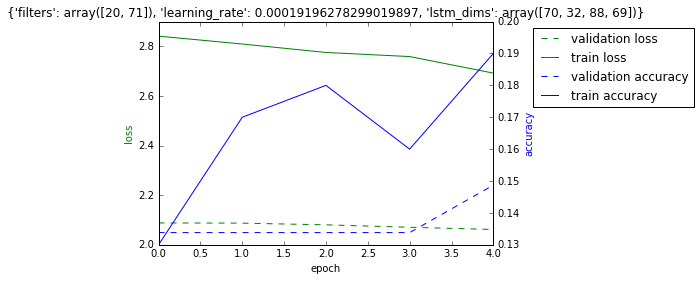

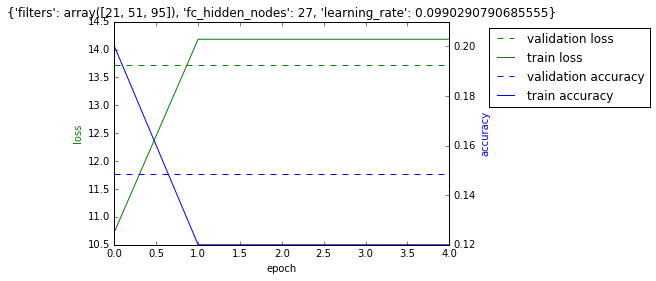

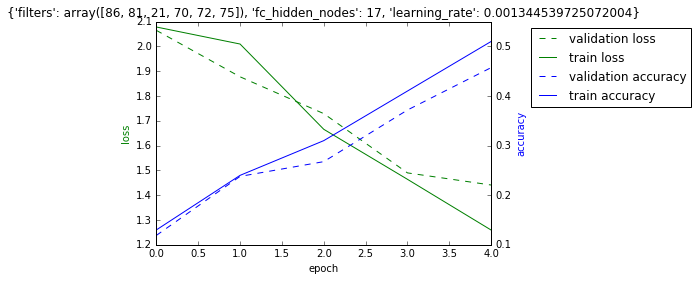

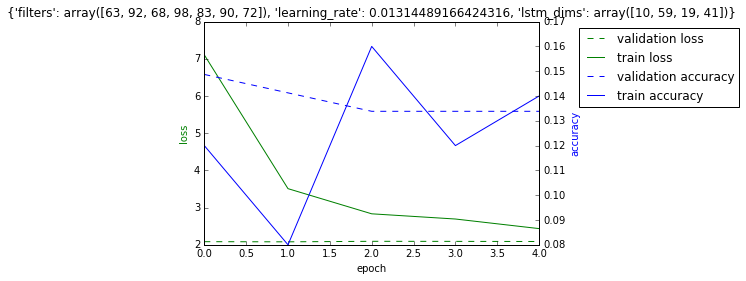

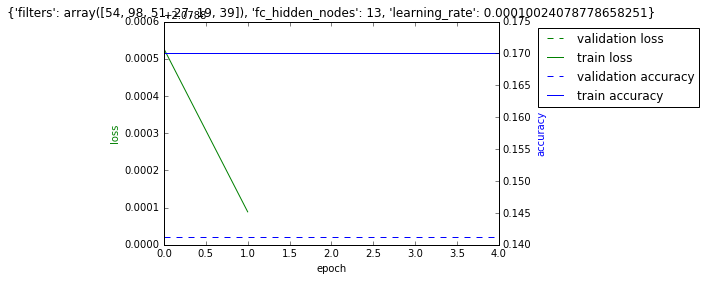

In [14]:
best_model, best_params, best_model_type = find_architecture.find_best_architecture(X_train, y_train_binary, X_val, y_val_binary, verbose=True,
                           number_of_models=5)

## Train the best model for real

In [15]:
best_model_index = np.argmax(val_accuracies)
#best_model_index = 3

In [16]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

3 DeepConvLSTM {'filters': array([56]), 'learning_rate': 0.05090670012623696, 'lstm_dims': array([94])}


In [17]:
nr_epochs = 10
datasize = X_train.shape[0]#1000
history = best_model.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              nb_epoch=nr_epochs, validation_data=(X_val, y_val_binary))

Train on 627 samples, validate on 269 samples
Epoch 1/10
627/627 [==============================] - 14s - loss: 1.3405 - acc: 0.5455 - val_loss: 0.8193 - val_acc: 0.6691
Epoch 2/10
627/627 [==============================] - 13s - loss: 0.8701 - acc: 0.6954 - val_loss: 0.6365 - val_acc: 0.7175
Epoch 3/10
627/627 [==============================] - 14s - loss: 0.7683 - acc: 0.7257 - val_loss: 0.6775 - val_acc: 0.7770
Epoch 4/10
627/627 [==============================] - 13s - loss: 0.6773 - acc: 0.7592 - val_loss: 0.4289 - val_acc: 0.8662
Epoch 5/10
627/627 [==============================] - 14s - loss: 0.8347 - acc: 0.7257 - val_loss: 0.5250 - val_acc: 0.7993
Epoch 6/10
627/627 [==============================] - 14s - loss: 0.6422 - acc: 0.7671 - val_loss: 0.4978 - val_acc: 0.8401
Epoch 7/10
627/627 [==============================] - 13s - loss: 0.7262 - acc: 0.7400 - val_loss: 0.4784 - val_acc: 0.8401
Epoch 8/10
627/627 [==============================] - 13s - loss: 0.6202 - acc: 0.7911

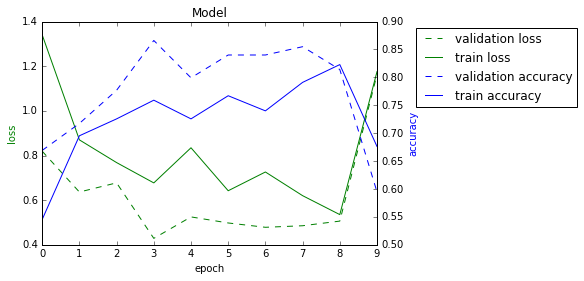

In [ ]:
find_architecture.plotTrainingProcess(history)

## Test on Testset

In [ ]:
score_test = best_model.evaluate(X_test, y_test_binary, verbose=False)
print('Score of best model: ' + str(score_test))

In [ ]:
best_model.get_config()[0]